# Data and task description



Connect Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task**: 
Forecast houses sale price

**Metrics**: Mean Absolute Error (MAE) or Root of Mean Squared Error (RMSE)

**Files description**

* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each colum
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

**Here's a brief version of what you'll find in the data description file.**
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Import libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime, date, time

import sklearn.linear_model
import sklearn.feature_extraction
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

import matplotlib.pyplot as plt
from pprint import pformat
plt.style.use('ggplot')

#import category_encoders as ce

In [4]:
# Path to our data 
PATH = "../content/drive/My Drive/Аспирантура ФА/Проведение вебинара Введение в анализ данных/Webinar 28 04 (Intro to DS)/data/"

In [5]:
# View settings of pandas dataframe 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
# Load data from Google Drive
df = pd.read_csv(PATH+'train.csv', index_col='Id')

# Drop duplicates
df = df.drop_duplicates()

# Show first several rows
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Show the first row
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [8]:
# Show last 5 rows
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
# Load test data
test = pd.read_csv(PATH+'test.csv', index_col='Id')

# Show first five rows
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
# Show last 5 rows
test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


# Data Preprocessing (Part 1)

In [15]:
# List of features descriptions
short_column_description = ['Identifies the type of dwelling involved in the sale',
                            'Identifies the general zoning classification of the sale',
                            'Linear feet of street connected to property',
                            'Lot size in square feet',
                            'Type of road access to property',
                            'Type of alley access to property',
                            'General shape of property',
                            'Flatness of the property',
                            'Type of utilities available',
                            'Lot configuration',
                            'Slope of property',
                            'Physical locations within Ames city limits',
                            'Proximity to various conditions',
                            'Proximity to various conditions (if more than one is present)',
                            'Type of dwelling','Style of dwelling',
                            'Rates the overall material and finish of the house',
                            'Rates the overall condition of the house',
                            'Original construction date',
                            'Remodel date (same as construction date if no remodeling or additions)',
                            'Type of roof',
                            'Roof material',
                            'Exterior covering on house',
                            'Exterior covering on house (if more than one material)',
                            'Masonry veneer type',
                            'Masonry veneer area in square feet',
                            'Evaluates the quality of the material on the exterior ',
                            'Evaluates the present condition of the material on the exterior',
                            'Type of foundation',
                            'Evaluates the height of the basement',
                            'Evaluates the general condition of the basement',
                            'Refers to walkout or garden level walls',
                            'Rating of basement finished area',
                            'Type 1 finished square feet',
                            'Rating of basement finished area (if multiple types)',
                            'Type 2 finished square feet',
                            'Unfinished square feet of basement area',
                            'Total square feet of basement area',
                            'Type of heating',
                            'Heating quality and condition',
                            'Central air conditioning',
                            'Electrical system',
                            'First Floor square feet',
                            'Second floor square feet',
                            'Low quality finished square feet (all floors)',
                            'Above grade (ground) living area square feet',
                            'Basement full bathrooms',
                            'Basement half bathrooms',
                            'Full bathrooms above grade',
                            'Half baths above grade',
                            'Bedrooms above grade (does NOT include basement bedrooms)',
                            'Kitchens above grade',
                            'Kitchen quality',
                            'Total rooms above grade (does not include bathrooms)',
                            'Home functionality (Assume typical unless deductions are warranted)',
                            'Number of fireplaces',
                            'Fireplace quality',
                            'Garage location',
                            'Year garage was built',
                            'Interior finish of the garage',
                            'Size of garage in car capacity',
                            'Size of garage in square feet',
                            'Garage quality',
                            'Garage condition',
                            'Paved driveway',
                            'Wood deck area in square feet',
                            'Open porch area in square feet',
                            'Enclosed porch area in square feet',
                            'Three season porch area in square feet',
                            'Screen porch area in square feet',
                            'Pool area in square feet',
                            'Pool quality',
                            'Fence quality',
                            'Miscellaneous feature not covered in other categories',
                            '$Value of miscellaneous feature',
                            'Month Sold (MM)',
                            'Year Sold (YYYY)',
                            'Type of sale',
                            'Condition of sale',
                            '']

In [16]:
# Function for getting info about dataset: Feature - Name, Number of Nan values, Number of unique values, Data type
def get_df_info(df, ftrs_desc = None):

  res = pd.DataFrame({'Feature': df.columns.tolist(),
                      'NaN_count': df.isna().sum().tolist(),
                      'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
                      'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)
                       })
  
  # If features descriptions exists
  if ftrs_desc is not None:
    res['column_description'] = ftrs_desc
  
  return res
                

## Train Dataset

In [17]:
# Check how many rows and columns we have
df.shape

(1460, 80)

In [18]:
get_df_info(df, short_column_description)

,Feature,NaN_count,number_of_unique_elements,type,column_description
0,MSSubClass,0,15,int64,Identifies the type of dwelling involved in th...
1,MSZoning,0,5,object,Identifies the general zoning classification o...
2,LotFrontage,259,110,float64,Linear feet of street connected to property
3,LotArea,0,1073,int64,Lot size in square feet
4,Street,0,2,object,Type of road access to property
5,Alley,1369,2,object,Type of alley access to property
6,LotShape,0,4,object,General shape of property
7,LandContour,0,4,object,Flatness of the property
8,Utilities,0,2,object,Type of utilities available
9,LotConfig,0,5,object,Lot configuration


In [19]:
 # check features with a lot of missing values
 get_df_info(df, short_column_description)[get_df_info(df, short_column_description)['NaN_count'] >= (len(df)/2)]

,Feature,NaN_count,number_of_unique_elements,type,column_description
5,Alley,1369,2,object,Type of alley access to property
71,PoolQC,1453,3,object,Pool quality
72,Fence,1179,4,object,Fence quality
73,MiscFeature,1406,4,object,Miscellaneous feature not covered in other cat...


Delete features with a lot of Nan values: Alley, PoolQC, Fence, MiscFeature. 

!!! Be careful: NA not always means missing value. Sometimes it can be described like the absence of something: pool, security, fence

## Test Dataset

In [20]:
test.shape

(1459, 79)

In [21]:
# There is no target feature "SalePrice" in test data
get_df_info(test, short_column_description[:-1])

,Feature,NaN_count,number_of_unique_elements,type,column_description
0,MSSubClass,0,16,int64,Identifies the type of dwelling involved in th...
1,MSZoning,4,5,object,Identifies the general zoning classification o...
2,LotFrontage,227,115,float64,Linear feet of street connected to property
3,LotArea,0,1106,int64,Lot size in square feet
4,Street,0,2,object,Type of road access to property
5,Alley,1352,2,object,Type of alley access to property
6,LotShape,0,4,object,General shape of property
7,LandContour,0,4,object,Flatness of the property
8,Utilities,2,1,object,Type of utilities available
9,LotConfig,0,5,object,Lot configuration


In [22]:
cols = df.columns.to_list()
print(len(cols))

80


In [23]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


Show unique values of the feature "BsmtHalfBath" - Basement half bathrooms

In [24]:
df['BsmtHalfBath'].unique().tolist()

[0, 1, 2]

In [25]:
df['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

Same thing with others

In [26]:
df['FullBath'].unique().tolist()

[2, 1, 3, 0]

In [27]:
df['HalfBath'].unique().tolist()

[1, 0, 2]

In [28]:
df['BedroomAbvGr'].unique().tolist()

[3, 4, 1, 2, 0, 5, 6, 8]

In [29]:
df['KitchenAbvGr'].unique().tolist()

[1, 2, 3, 0]

In [30]:
df['TotRmsAbvGrd'].unique().tolist()

[8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]

In [31]:
df['Fireplaces'].unique().tolist()

[0, 1, 2, 3]

In [32]:
# Lets put all data preprocessing pipeline in one function
def data_preprocessing(data):

  # Delete features
  data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True)
  
  # Separetely define numerical featurees 
  num_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
              '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
              'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
              'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
              'MiscVal', 'MoSold', 'YrSold']

  # define categorical features 
  cat_cols = [i for i in data.columns if i not in num_cols]

  # print(cat_cols) # TEST 

  ####### categorical features #######

  # regarding the attribute "Utilities" Nan most likely means that everything is available - "AllPub". 
  # If there was one thing (water, gas, electricity), then they would definitely mark
  data['Utilities'].fillna('AllPub', inplace = True)

  data['MasVnrType'].fillna('None', inplace = True)
  data['Exterior1st'].fillna('Other', inplace = True)
  data['Exterior2nd'].fillna('Other', inplace = True)
  
  # Nan is replaced by the standard SBrkr. Similar to Utilities
  data['Electrical'].fillna('SBrkr', inplace = True)
  
  # Nan is replaced by a regular WD contract. Similar to SBrkr
  data['SaleType'].fillna('WD', inplace = True)
  
  # Nan is replaced with typical TA and Typ for KitchenQual and Functional features
  data['KitchenQual'].fillna('TA',inplace = True)
  data['Functional'].fillna('Typ',inplace = True)

  # The remaining Nan are replaced by NA
  for i in cat_cols: 
    data[i].fillna('NA', inplace = True)

  ####### Numerical data #######
  ## replace with mode 
  data['LotFrontage'].fillna(float(data['LotFrontage'].mode()), inplace = True)
  data['BsmtFinSF1'].fillna(float(data['BsmtFinSF1'].mode()), inplace = True)
  data['BsmtFinSF2'].fillna(float(data['BsmtFinSF2'].mode()), inplace = True)
  data['BsmtUnfSF'].fillna(float(data['BsmtUnfSF'].mode()), inplace = True)

  data.loc[data['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = data.loc[data['TotalBsmtSF'].isnull()]['BsmtFinSF1'] \
                                                          + data.loc[data['TotalBsmtSF'].isnull()]['BsmtFinSF2'] \
                                                          + data.loc[data['TotalBsmtSF'].isnull()]['BsmtUnfSF']  
  # Others Nan replace with 0 
  for j in num_cols: 
    data[j].fillna(0.0, inplace = True)

  # At first glance, the numerical feature of MSSubClass. But the number denotes the type, so the feature must be categorical
  data['MSSubClass'] = data['MSSubClass'].astype('str')

  return data

In [35]:
# Data preprocessing 
test_ftrs = data_preprocessing(test)

# In the training dataset we take only features - we remove a target ("SalePrice") 
train_ftrs = data_preprocessing(df.drop(columns=['SalePrice'])) 

In [36]:
# Check Nan in Train subset
get_df_info(train_ftrs)[get_df_info(train_ftrs)['NaN_count'] > 0]

,Feature,NaN_count,number_of_unique_elements,type


In [37]:
# Check Nan in Test subset
get_df_info(test_ftrs)[get_df_info(train_ftrs)['NaN_count'] > 0]

,Feature,NaN_count,number_of_unique_elements,type


# Exploratory Data Analysis

In [38]:
# EDA with initial data
df_v = pd.read_csv(PATH+'train.csv', index_col='Id')

In [39]:
# Have a look at the target (SalePrice)
df_v['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

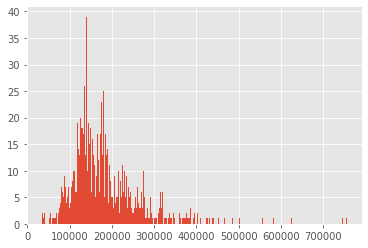

In [40]:
# Plot histogram
df_v['SalePrice'].hist(bins=500);

* There are several outliers after 500000 (with bins=500)
* We need to remove them! 

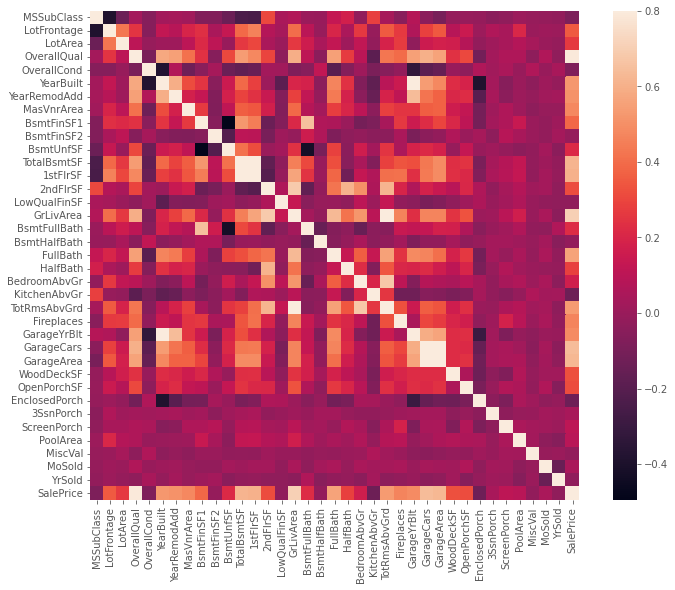

In [41]:
# Correlation matrix - How features depend with each other. Are there dependent features? 
corrmat = df_v.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

correlate with each other: 
* garageYearBuilt - (0.825667) - YearBuilt
* 1stflrsf - (0.819530) - totalBSMTsf
* totRmsAbvGrd - (0.825489) - GrLivArea
* garageCars - (0.882475) - GarageArea



correlate with target feature:
* garageYearBuilt (0.486)- YearBuilt (0.52)
* 1stflrsf (0.605)- totalBSMTsf (0.614)
* totRmsAbvGrd (0.534) - GrLivArea (0.71)
* garageCars (0.64) - GarageArea (0.62)


In [42]:
# filter features
df_v.corr()[abs(df_v.corr() >=0.5)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.547766,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Find the most influential (important) features
df_v.corr().loc['SalePrice'].loc[df_v.corr().loc['SalePrice']>0.6]

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

The most important: OverallQual(categorical), TotalBsmtSF, GrLivArea, GarageCars (categorical)

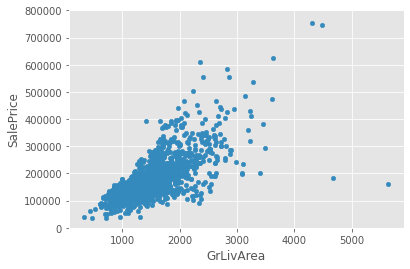

In [ ]:
#scatter plot GrLivArea/saleprice
var = 'GrLivArea'
data = pd.concat([df_v['SalePrice'], df_v[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Almost direct relationship -> linear regression! Indeed it is, since the living area almost completely determines the price of real estate

(-0.5, 9.5, 0.0, 800000.0)

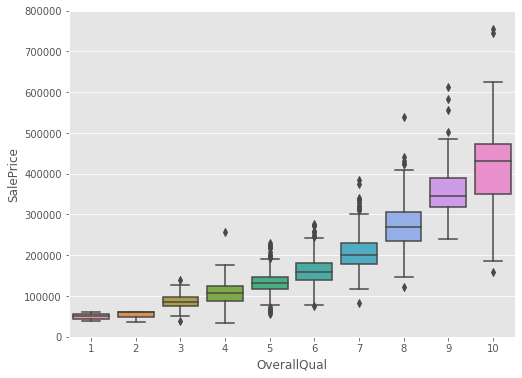

In [44]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_v['SalePrice'], df_v[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


the better the quality, the more expensive the house - OK

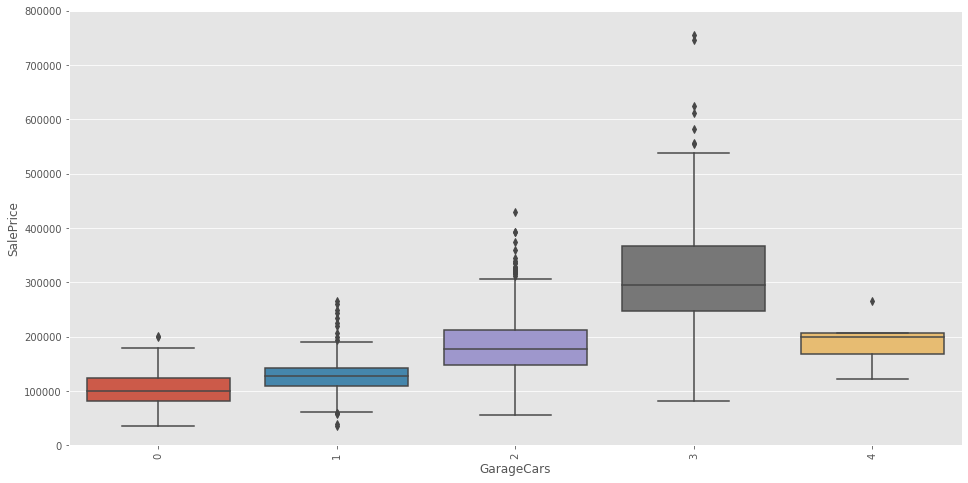

In [45]:
#box plot GarageCars/saleprice
var = 'GarageCars'
data = pd.concat([df_v['SalePrice'], df_v[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

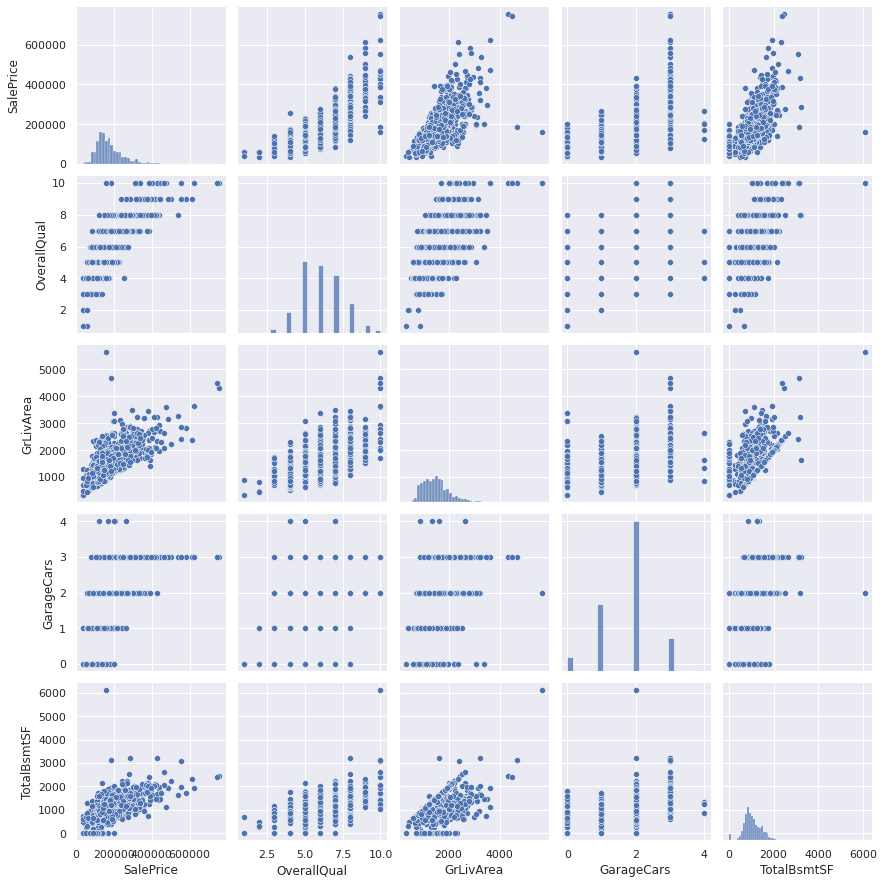

In [46]:
# Pairplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df_v[cols], size = 2.5)
plt.show()

Interesting dependency between TotalBsmtSF and GrLivArea, but understandable. Basement and living space are comparable in life. The basement is usually built smaller than the living area

# Feature Engineering

In [47]:
def generate_new_features(data):

  # Separation of each type of Utilities into a separate attribute
  data['Electricity'] = 1
  data['Gas'] = data['Utilities'].apply(lambda x: 0 if x == 'ELO' else 1)
  data['Water'] = data['Utilities'].apply(lambda x: 0 if x in ['ELO','NoSeWa'] else 1)
  data['Sewer'] = data['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)

  data.drop(columns=['Utilities'], inplace=True)

  #----------------------------------------------------------------------------#

  # If condition1 = condition2 = normal, then the houses are normal
  def NormalCondition_generate(row):
    if row['Condition1'] == 'Norm' and row['Condition2'] == 'Norm':
      return 1
    else:
      return 0

  data['NormalCondition'] = data.apply(lambda row: NormalCondition_generate(row), axis = 1)

  #----------------------------------------------------------------------------#

  # Has the house been remodeled?
  def Remodeling_generate(row):
    if row['YearBuilt'] != row['YearRemodAdd']:
      return 1
    else:
      return 0

  data['Remodeling'] = data.apply(lambda row: Remodeling_generate(row), axis = 1)

  #----------------------------------------------------------------------------#

  # The quality of the house and finishes are both above average
  def AboveAverageOverallQuality_generate(row):
    if (row['OverallQual'] in [6,7,8,9,10]) and (row['OverallCond'] in [6,7,8,9,10]):
      return 1
    else:
      return 0

  data['AboveAverageOverallQuality'] = data.apply(lambda row: AboveAverageOverallQuality_generate(row), axis = 1)

  #----------------------------------------------------------------------------#

  # Two different exterior materials
  def MultipleExterior_generate(row):
    if row['Exterior1st'] != row['Exterior2nd']:
      return 1
    else:
      return 0

  data['MultipleExterior'] =  data.apply(lambda row: MultipleExterior_generate(row), axis = 1)

  #----------------------------------------------------------------------------#
  
  # Area shares
  data['MasVnrAreaFraction'] = data['MasVnrArea'] / data['LotArea']
  data['GrLivAreaFraction'] = data['GrLivArea'] / data['LotArea']
  data['GarageAreaFraction'] = data['GarageArea'] / data['LotArea']
  data['PoolAreaFraction'] = data['PoolArea'] / data['LotArea']
  data['BsmtFinSF1Fraction'] = data['BsmtFinSF1'] / data['LotArea']
  data['BsmtFinSF2Fraction'] = data['BsmtFinSF2'] / data['LotArea']
  data['BsmtUnfSFFraction'] = data['BsmtUnfSF']   / data['LotArea']
  data['TotalBsmtSFFraction'] = data['TotalBsmtSF'] / data['LotArea']
  data['1stFlrSFFraction'] = data['1stFlrSF'] / data['LotArea']
  data['2ndFlrSFFraction'] = data['2ndFlrSF'] / data['LotArea']
  data['LowQualFinSFFraction'] = data['LowQualFinSF'] / data['LotArea']
  data['WoodDeckSFFraction'] = data['WoodDeckSF'] / data['LotArea']
  data['OpenPorchSFFraction'] = data['OpenPorchSF'] / data['LotArea']
  data['EnclosedPorchFraction'] = data['EnclosedPorch'] / data['LotArea']
  data['3SsnPorchFraction'] = data['3SsnPorch'] / data['LotArea']
  data['ScreenPorchFraction'] = data['ScreenPorch']  / data['LotArea']

  #----------------------------------------------------------------------------#

  # Season
  def SeasonSold_generate(month):
    if month in (12,1,2):
      return 'Winter'
    elif month in (3,4,5):
      return 'Spring'
    elif month in (6,7,8):
      return 'Summer'
    else:
      return 'Fall'

  data['SeasonSold'] = data['MoSold'].apply(SeasonSold_generate)
  data.drop(columns=['MoSold'], inplace=True)

  #----------------------------------------------------------------------------#

  # House age
  def house_age_generate(row):
    return 2021 - row['YearBuilt'] 

  data['house_age'] = data.apply(lambda row: house_age_generate(row), axis = 1)
  data.drop(columns=['YearBuilt'], inplace=True)

  #----------------------------------------------------------------------------#

  # "age" of repair
  def repair_age_generate(row):
    return 2021 - row['YearRemodAdd'] 

  data['repair_age'] = data.apply(lambda row: repair_age_generate(row), axis = 1)
  data.drop(columns=['YearRemodAdd'], inplace=True)

  #----------------------------------------------------------------------------#

  # "age" of garage
  def garage_age_generate(row):
    return 2021 - row['GarageYrBlt'] 

  data['garage_age'] = data.apply(lambda row: garage_age_generate(row), axis = 1)
  data.drop(columns=['GarageYrBlt'], inplace=True)
  
  #----------------------------------------------------------------------------#

  # Sold term
  def sold_age_generate(row):
    return 2021 - row['YrSold'] 

  data['sold_age'] = data.apply(lambda row: sold_age_generate(row), axis = 1)
  data.drop(columns=['YrSold'], inplace=True)

  #--------------------------- Features with quality -------------------------------#
  
  # we introduce numerical equivalent instead of categorical quality gradations 

  # For following features: 
  # ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC
  # KitchenQual, FireplaceQu, GarageQual, GarageCond
  def quality1_to_num_generate(qual):
    if qual == 'Ex': 
      return 5
    elif qual == 'Gd': 
      return 4
    elif qual == 'TA': 
      return 3
    elif qual == 'Fa': 
      return 2 
    elif qual == 'Po': 
      return 1 
    else: 
      return -1
  
  list_features = ['ExterQual',  'ExterCond',  'BsmtQual',  'BsmtCond',  'HeatingQC',  'KitchenQual',  'FireplaceQu',  'GarageQual',  'GarageCond']
  for i in list_features:
    data[i] = data[i].apply(quality1_to_num_generate)

  # For BsmtExposure
  def quality2_to_num_generate(qual):
    if qual == 'Gd': 
      return 4
    elif qual == 'Av': 
      return 3
    elif qual == 'Mn': 
      return 2
    elif qual == 'No': 
      return 1 
    else: 
      return -1

  data['BsmtExposure'] = data['BsmtExposure'].apply(quality2_to_num_generate)

  # For BsmtFinType1, BsmtFinType2, 
  def quality3_to_num_generate(qual):
    if qual == 'GLQ': 
      return 6
    elif qual == 'ALQ': 
      return 5
    elif qual == 'BLQ': 
      return 4
    elif qual == 'Rec': 
      return 3 
    elif qual == 'LwQ': 
      return 2
    elif qual == 'Unf': 
      return 1 
    else: 
      return -1

  data['BsmtFinType1'] = data['BsmtFinType1'].apply(quality3_to_num_generate)
  data['BsmtFinType2'] = data['BsmtFinType2'].apply(quality3_to_num_generate)
 
  # For: GarageFinish
  def quality5_to_num_generate(qual):
    if qual == 'Fin': 
      return 3
    elif qual == 'RFn': 
      return 2
    elif qual == 'Unf': 
      return 1
    else: 
      return -1

  data['GarageFinish'] = data['GarageFinish'].apply(quality5_to_num_generate)

  # For CentralAir
  def quality6_to_num_generate(qual):
    if qual == 'N': 
      return 0
    elif qual == 'Y': 
      return 1
    else: 
      return -1

  data['CentralAir'] = data['CentralAir'].apply(quality6_to_num_generate)

  return data

In [48]:
# call our function of generating new features
train_with_new_ftrs = generate_new_features(train_ftrs)
test_with_new_ftrs = generate_new_features(test_ftrs)

In [49]:
# Check our dataset
get_df_info(train_with_new_ftrs)

,Feature,NaN_count,number_of_unique_elements,type
0,MSSubClass,0,15,object
1,MSZoning,0,5,object
2,LotFrontage,0,110,float64
3,LotArea,0,1073,int64
4,Street,0,2,object
5,LotShape,0,4,object
6,LandContour,0,4,object
7,LotConfig,0,5,object
8,LandSlope,0,3,object
9,Neighborhood,0,25,object


In [50]:
# Categorical features
get_df_info(train_with_new_ftrs)[get_df_info(train_with_new_ftrs)['type'] == 'object']

,Feature,NaN_count,number_of_unique_elements,type
0,MSSubClass,0,15,object
1,MSZoning,0,5,object
4,Street,0,2,object
5,LotShape,0,4,object
6,LandContour,0,4,object
7,LotConfig,0,5,object
8,LandSlope,0,3,object
9,Neighborhood,0,25,object
10,Condition1,0,9,object
11,Condition2,0,8,object


In [51]:
# numerical features
get_df_info(train_with_new_ftrs)[get_df_info(train_with_new_ftrs)['type'] != 'object']

,Feature,NaN_count,number_of_unique_elements,type
2,LotFrontage,0,110,float64
3,LotArea,0,1073,int64
14,OverallQual,0,10,int64
15,OverallCond,0,9,int64
21,MasVnrArea,0,327,float64
22,ExterQual,0,4,int64
23,ExterCond,0,5,int64
25,BsmtQual,0,5,int64
26,BsmtCond,0,5,int64
27,BsmtExposure,0,5,int64


In [52]:
# make a list of numerical features
num_features = get_df_info(train_with_new_ftrs)[get_df_info(train_with_new_ftrs)['type'] != 'object']['Feature']

# make a list of categorical features
cat_features = get_df_info(train_with_new_ftrs)[get_df_info(train_with_new_ftrs)['type'] == 'object']['Feature']

print('cols in: ',  train_with_new_ftrs.shape[1])
print('cols_cnt: ', len(num_features) + len(cat_features))

cols in:  98
cols_cnt:  98


# Remove outliers

In [53]:
# Add target attribute because we need to remove rows with outliers
train_with_new_ftrs['SalePrice'] = df['SalePrice']

train_with_new_ftrs.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction,SeasonSold,house_age,repair_age,garage_age,sold_age,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,-1,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,WD,Normal,1,1,1,1,1,0,0,0,0.023195,0.202367,0.064852,0.0,0.083550,0.0,0.017751,0.101302,0.101302,0.101065,0.0,0.000000,0.007219,0.000000,0.0,0.0,Winter,18,18,18.0,13,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,WD,Normal,1,1,1,1,0,0,1,0,0.000000,0.131458,0.047917,0.0,0.101875,0.0,0.029583,0.131458,0.131458,0.000000,0.0,0.031042,0.000000,0.000000,0.0,0.0,Spring,45,45,45.0,14,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,WD,Normal,1,1,1,1,1,1,0,0,0.014400,0.158756,0.054044,0.0,0.043200,0.0,0.038578,0.081778,0.081778,0.076978,0.0,0.000000,0.003733,0.000000,0.0,0.0,Fall,20,19,20.0,13,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,WD,Abnorml,1,1,1,1,1,1,0,1,0.000000,0.179791,0.067225,0.0,0.022618,0.0,0.056545,0.079162,0.100628,0.079162,0.0,0.000000,0.003665,0.028482,0.0,0.0,Winter,106,51,23.0,15,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,WD,Normal,1,1,1,1,1,0,0,0,0.024544,0.154137,0.058626,0.0,0.045933,0.0,0.034362,0.080295,0.080295,0.073843,0.0,0.013464,0.005891,0.000000,0.0,0.0,Winter,21,21,21.0,13,250000


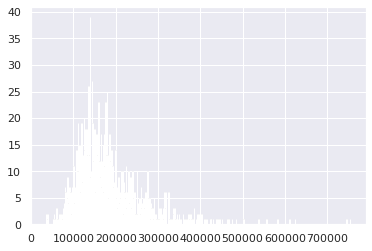

In [54]:
train_with_new_ftrs['SalePrice'].hist(bins=500, color = "k");

In [55]:
# Remove the most expensive houses 
train_with_new_ftrs = train_with_new_ftrs[train_with_new_ftrs['SalePrice'] <= 500000]

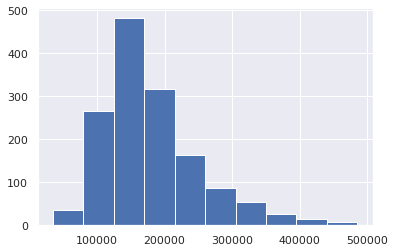

In [56]:
train_with_new_ftrs['SalePrice'].hist()

In [57]:
# Check outliers of numerical features
train_with_new_ftrs[num_features].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction,house_age,repair_age,garage_age,sold_age
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.0,1451.0,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,68.077877,10442.747760,6.079256,5.578222,99.972433,3.388008,3.083391,3.454859,2.909028,1.592695,3.509304,437.809097,1.219848,46.466575,566.076499,1050.352171,4.139904,0.934528,1156.673329,342.745003,5.880772,1505.299104,0.423846,0.057202,1.558236,0.380427,2.864232,1.046864,3.503101,6.492764,0.607857,1.337009,1.652653,1.759476,470.616127,2.753274,2.751895,93.669194,46.455548,22.090283,3.430737,14.760165,2.393522,43.758787,1.0,1.0,0.999311,0.999311,0.862164,0.475534,0.186768,0.146106,0.012472,0.180678,0.055522,0.000151,0.050577,0.005233,0.068767,0.124577,0.136286,0.043696,0.000696,0.010699,0.005272,0.002582,0.000313,0.001497,49.928325,36.250172,153.093728,13.186079
std,22.165276,9916.673175,1.362524,1.115370,173.498236,0.566021,0.351263,0.981130,0.693811,1.109297,2.154166,447.757832,0.939137,161.264463,440.565397,429.484478,0.960100,0.247442,379.591002,429.825177,48.771560,507.181630,0.518842,0.238172,0.544457,0.502411,0.812936,0.220990,0.656394,1.597125,0.642125,2.290340,1.018091,0.743272,212.044773,0.944557,0.942002,124.707744,66.345854,61.283981,29.406940,55.342585,37.599673,497.648467,0.0,0.0,0.026252,0.026252,0.344847,0.499573,0.389859,0.353334,0.029683,0.112150,0.037136,0.002663,0.057492,0.021753,0.067075,0.073923,0.071800,0.068305,0.005898,0.016872,0.008568,0.007336,0.002707,0.005791,30.189728,20.651395,454.978986,1.326587
min,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000
25%,60.000000,7517.500000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,222.000000,794.500000,3.000000,1.000000,882.000000,0.00

There are outliers in following features: 
* LotArea
* MasVnrArea
* BsmtFinSF1
* BsmtFinSF2
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* LowQualFinSF
* GrLivArea
* MiscVal
* PoolArea
* house_age
* garage_age





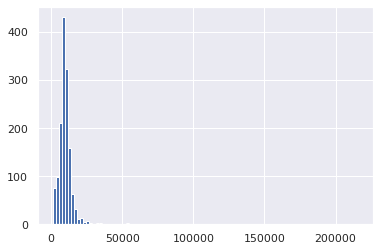

In [58]:
train_with_new_ftrs['LotArea'].hist(bins=100)

Remove the biggest houses

In [59]:
# Function for outliers removing
def del_outlier(df, feature, to_outlier): 
  df = df[df[feature] <= to_outlier] 
  df[feature].hist()
  return df

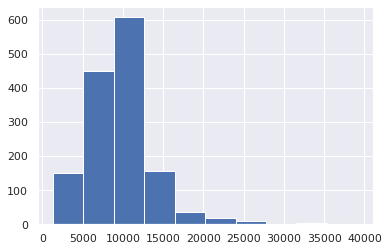

In [60]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'LotArea', 40000)

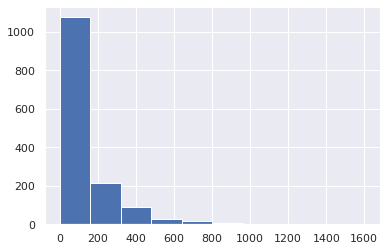

In [61]:
train_with_new_ftrs['MasVnrArea'].hist();

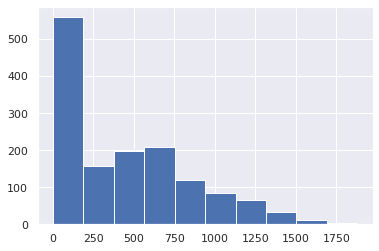

In [62]:
train_with_new_ftrs['BsmtFinSF1'].hist();

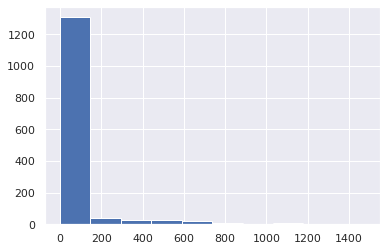

In [63]:
train_with_new_ftrs['BsmtFinSF2'].hist();

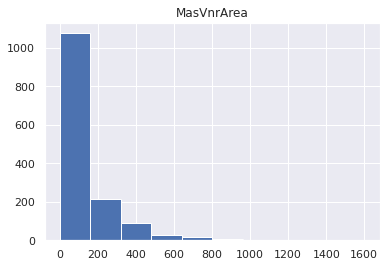

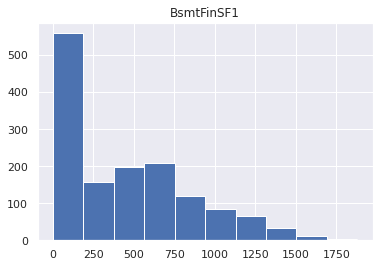

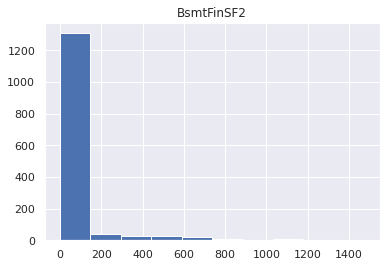

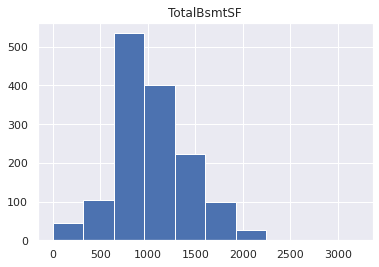

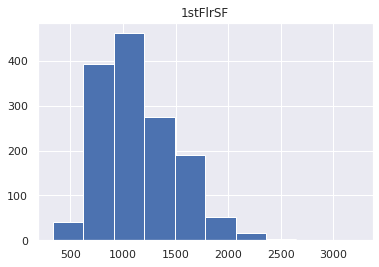

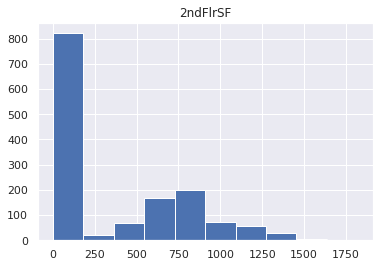

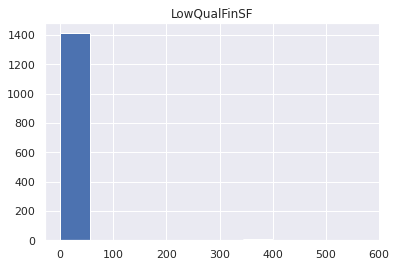

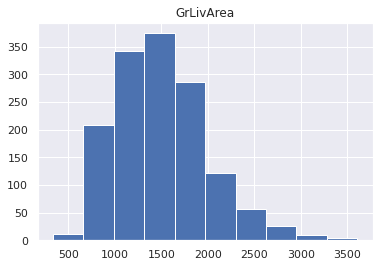

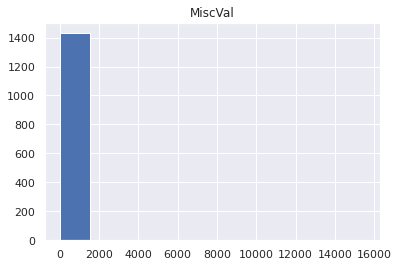

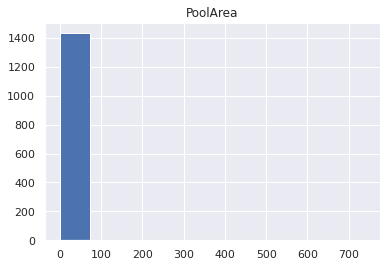

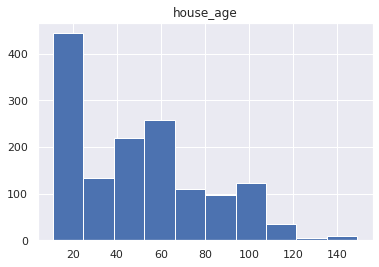

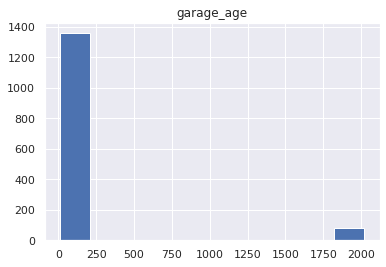

In [64]:
# draw histogramms of different features

list_tmp = ['MasVnrArea',  'BsmtFinSF1',  'BsmtFinSF2',
            'TotalBsmtSF',  '1stFlrSF',  '2ndFlrSF',  'LowQualFinSF',  
            'GrLivArea',  'MiscVal',  'PoolArea',  'house_age',  'garage_age']

for i in list_tmp: 
  plt.figure()
  plt.title(i)
  train_with_new_ftrs[i].hist()

Outliers removing:
* MasVnrArea (reduce to 1k) 
* BsmtFinSF2  (reduce to 800)
* LowQualFinSF (remove or reduce to 100) 
* MiscVal (remove or reduce to 2000) 
* PoolArea (remove or reduce to 100) 
* house_age (reduce to 120) 
* garage_age (reduce to 250) 

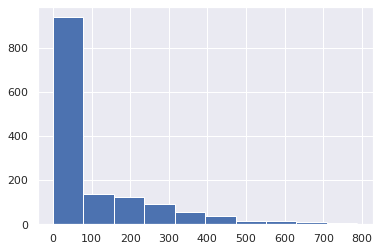

In [65]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'MasVnrArea', 800)

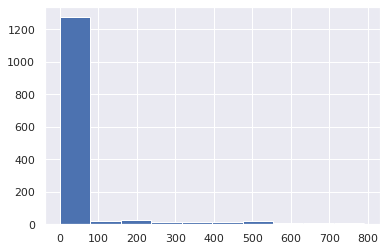

In [66]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'BsmtFinSF2', 800)

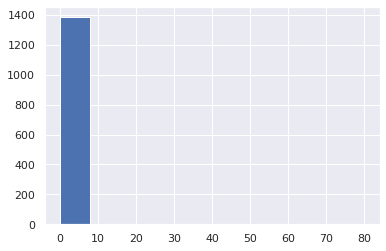

In [67]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'LowQualFinSF', 100)

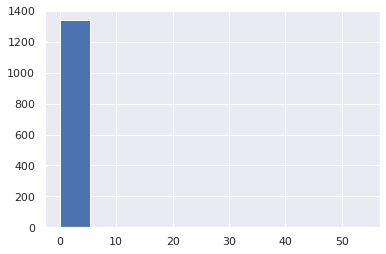

In [68]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'MiscVal', 250)

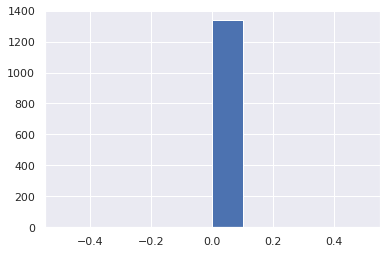

In [69]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'PoolArea', 100)

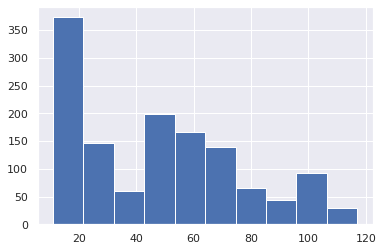

In [70]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'house_age', 120)

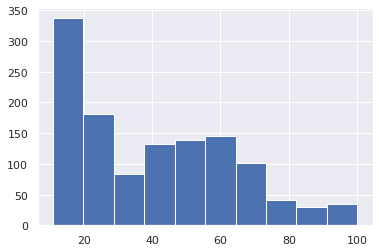

In [71]:
train_with_new_ftrs = del_outlier(train_with_new_ftrs, 'garage_age', 100)

Remove uninformative features

In [72]:
del_num_ftrs_list = ['LowQualFinSF', 'MiscVal', 'PoolArea']
train_with_new_ftrs.drop(columns=del_num_ftrs_list, inplace=True)

In [73]:
train_with_new_ftrs.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction,house_age,repair_age,garage_age,sold_age,SalePrice
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.00000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.0,1226.0,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.0,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,68.148450,9769.693312,6.185155,5.543230,102.365416,3.424144,3.084829,3.515498,2.932300,1.606036,3.622349,452.913540,1.186786,35.796085,574.246330,1062.955954,4.198206,0.961664,1162.402121,332.509788,1495.150897,0.424959,0.059543,1.575856,0.398042,2.842577,1.030995,3.553018,6.453507,0.623165,1.438825,1.832790,1.873573,499.28385,2.986949,2.984502,94.689233,45.522838,18.481240,3.685155,14.769168,1.0,1.0,0.999184,0.999184,0.873573,0.433116,0.177814,0.141109,0.013077,0.182395,0.060514,0.0,0.053706,0.004112,0.070194,0.128012,0.138710,0.043615,0.000070,0.011215,0.005326,0.002139,0.000341,0.001547,45.216966,34.842577,40.830343,13.198206,182776.563622
std,21.202329,4191.925880,1.301481,1.041274,155.229138,0.559479,0.319665,0.951993,0.656136,1.101656,2.148022,425.295628,0.851518,124.205232,447.003045,397.891590,0.941053,0.192085,361.260054,422.669192,456.789716,0.507572,0.240159,0.532568,0.502853,0.755182,0.173375,0.636992,1.494985,0.629805,2.288911,0.809496,0.620338,179.75868,0.197518,0.182288,120.927425,59.585575,55.959592,30.403309,53.276956,0.0,0.0,0.028560,0.028560,0.332466,0.495709,0.382512,0.348276,0.028161,0.112949,0.036339,0.0,0.058626,0.016928,0.068460,0.074550,0.072383,0.069379,0.001359,0.017239,0.008325,0.006732,0.002847,0.005851,26.835010,20.251251,23.224665,1.325676,69142.081958
min,21.000000,1300.000000,2.000000,2.000000,0.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,438.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,-1.000000,1.000000,1.000000,160.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030476,0.010685,0.0,0.000000,0.000000,0.000000,0.000000,0.030476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,35311.000000
25%,60.000000,7591.500000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,224.000000,816.000000,3.000000,1.000000,894.000000,0.000000,1141.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,-1.000000,1.000000,

Check categorical features

In [74]:
train_with_new_ftrs.describe(include='object')

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition,SeasonSold
count,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
unique,15,5,2,4,4,5,3,25,9,5,5,7,6,6,14,16,4,6,6,4,7,6,3,9,6,4
top,20,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal,Summer
freq,480,994,1223,770,1118,893,1171,198,1071,1220,1029,631,966,1210,471,460,687,588,1210,1136,1156,796,1164,1061,1009,515


Remove uninformative features

In [75]:
cat_ftrs_info = train_with_new_ftrs.describe(include='object').T
cat_ftrs_info[cat_ftrs_info['freq'] > 1000]

,count,unique,top,freq
Street,1226,2,Pave,1223
LandContour,1226,4,Lvl,1118
LandSlope,1226,3,Gtl,1171
Condition1,1226,9,Norm,1071
Condition2,1226,5,Norm,1220
BldgType,1226,5,1Fam,1029
RoofMatl,1226,6,CompShg,1210
Heating,1226,6,GasA,1210
Electrical,1226,4,SBrkr,1136
Functional,1226,7,Typ,1156


In [76]:
del_cat_ftrs_list = cat_ftrs_info[cat_ftrs_info['freq'] > 1000].index.to_list()
train_with_new_ftrs.drop(columns=del_cat_ftrs_list, inplace=True)

In [77]:
print(train_with_new_ftrs.shape)

(1226, 83)


In [78]:
train_with_new_ftrs.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction,SeasonSold,house_age,repair_age,garage_age,sold_age,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1453,180,RM,35.0,3675,Reg,Inside,Edwards,SLvl,5,5,Gable,VinylSd,VinylSd,BrkFace,80.0,3,3,PConc,4,3,4,6,547,1,0,0,547,4,1,1072,0,1072,1,0,1,0,2,1,3,5,0,-1,Basment,3,2,525,3,3,0,28,0,0,0,1,1,1,1,1,0,0,0,0.021769,0.291701,0.142857,0.0,0.148844,0.000000,0.000000,0.148844,0.291701,0.000000,0.0,0.000000,0.007619,0.0,0.0,0.0,Spring,16,16,16.0,15,145000
1455,20,FV,62.0,7500,Reg,Inside,Somerst,1Story,7,5,Gable,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,1,6,410,1,0,811,1221,5,1,1221,0,1221,1,0,2,0,2,1,4,6,0,-1,Attchd,2,2,400,3,3,0,113,0,0,0,1,1,1,1,1,1,0,0,0.000000,0.162800,0.053333,0.0,0.054667,0.000000,0.108133,0.162800,0.162800,0.000000,0.0,0.000000,0.015067,0.0,0.0,0.0,Fall,17,16,17.0,12,185000
1456,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0,1,0,953,953,5,1,953,694,1647,0,0,2,1,3,1,3,7,1,3,Attchd,2,2,460,3,3,0,40,0,0,0,1,1,1,1,1,1,0,0,0.000000,0.208033,0.058103,0.0,0.000000,0.000000,0.120374,0.120374,0.120374,0.087659,0.0,0.000000,0.005052,0.0,0.0,0.0,Summer,22,21,22.0,14,175000
1457,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,Gable,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,1,5,790,3,163,589,1542,3,1,2073,0,2073,1,0,2,0,3,1,3,7,2,3,Attchd,1,2,500,3,3,349,0,0,0,0,1,1,1,1,1,1,1,0,0.009032,0.157343,0.037951,0.0,0.059962,0.012372,0.044706,0.117040,0.157343,0.000000,0.0,0.026490,0.000000,0.0,0.0,0.0,Winter,43,33,43.0,11,210000
1460,20,RL,75.0,9937,Reg,Inside,Edwards,1Story,5,6,Gable,HdBoard,HdBoard,None,0.0,4,3,CBlock,3,3,1,4,830,2,290,136,1256,4,1,1256,0,1256,1,0,1,1,3,1,3,6,0,-1,Attchd,3,1,276,3,3,736,68,0,0,0,1,1,1,1,1,0,0,0,0.000000,0.126396,0.027775,0.0,0.083526,0.029184,0.013686,0.126396,0.126396,0.000000,0.0,0.074067,0.006843,0.0,0.0,0.0,Summer,56,56,56.0,13,147500


In [79]:
# Reset index in dataset
train_with_new_ftrs = train_with_new_ftrs.reset_index().drop(columns=['Id'])
train_with_new_ftrs.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction,SeasonSold,house_age,repair_age,garage_age,sold_age,SalePrice
1221,180,RM,35.0,3675,Reg,Inside,Edwards,SLvl,5,5,Gable,VinylSd,VinylSd,BrkFace,80.0,3,3,PConc,4,3,4,6,547,1,0,0,547,4,1,1072,0,1072,1,0,1,0,2,1,3,5,0,-1,Basment,3,2,525,3,3,0,28,0,0,0,1,1,1,1,1,0,0,0,0.021769,0.291701,0.142857,0.0,0.148844,0.000000,0.000000,0.148844,0.291701,0.000000,0.0,0.000000,0.007619,0.0,0.0,0.0,Spring,16,16,16.0,15,145000
1222,20,FV,62.0,7500,Reg,Inside,Somerst,1Story,7,5,Gable,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,1,6,410,1,0,811,1221,5,1,1221,0,1221,1,0,2,0,2,1,4,6,0,-1,Attchd,2,2,400,3,3,0,113,0,0,0,1,1,1,1,1,1,0,0,0.000000,0.162800,0.053333,0.0,0.054667,0.000000,0.108133,0.162800,0.162800,0.000000,0.0,0.000000,0.015067,0.0,0.0,0.0,Fall,17,16,17.0,12,185000
1223,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0,1,0,953,953,5,1,953,694,1647,0,0,2,1,3,1,3,7,1,3,Attchd,2,2,460,3,3,0,40,0,0,0,1,1,1,1,1,1,0,0,0.000000,0.208033,0.058103,0.0,0.000000,0.000000,0.120374,0.120374,0.120374,0.087659,0.0,0.000000,0.005052,0.0,0.0,0.0,Summer,22,21,22.0,14,175000
1224,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,Gable,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,1,5,790,3,163,589,1542,3,1,2073,0,2073,1,0,2,0,3,1,3,7,2,3,Attchd,1,2,500,3,3,349,0,0,0,0,1,1,1,1,1,1,1,0,0.009032,0.157343,0.037951,0.0,0.059962,0.012372,0.044706,0.117040,0.157343,0.000000,0.0,0.026490,0.000000,0.0,0.0,0.0,Winter,43,33,43.0,11,210000
1225,20,RL,75.0,9937,Reg,Inside,Edwards,1Story,5,6,Gable,HdBoard,HdBoard,None,0.0,4,3,CBlock,3,3,1,4,830,2,290,136,1256,4,1,1256,0,1256,1,0,1,1,3,1,3,6,0,-1,Attchd,3,1,276,3,3,736,68,0,0,0,1,1,1,1,1,0,0,0,0.000000,0.126396,0.027775,0.0,0.083526,0.029184,0.013686,0.126396,0.126396,0.000000,0.0,0.074067,0.006843,0.0,0.0,0.0,Summer,56,56,56.0,13,147500


# Data Preprocessing (Part 2)

* Normalization/Standardization
* Handling categorical features

In [80]:
train = train_with_new_ftrs.drop(columns=['SalePrice'])
target = train_with_new_ftrs['SalePrice']
target_log = np.log(target)

In [81]:
# A lot of features were removed from the data train. Let's take features from train subset into the test subset 
test = test_with_new_ftrs[train.columns.to_list()]

In [82]:
print('train: ', train.shape)
print('test: ', test.shape)

train:  (1226, 82)
test:  (1459, 82)


In [83]:
# Numerical features 
num_features = train.columns[train.dtypes != 'object'].tolist()
num_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'Electricity',
 'Gas',
 'Water',
 'Sewer',
 'NormalCondition',
 'Remodeling',
 'AboveAverageOverallQuality',
 'MultipleExterior',
 'MasVnrAreaFraction',
 'GrLivAreaFraction',
 'GarageAreaFraction',
 'PoolAreaFraction',
 'BsmtFinSF1Fraction',
 'BsmtFinSF2Fraction',
 'BsmtUnfSFFraction',
 'TotalBsmtSFFraction',
 '1stFlrSFFraction',
 '2ndFlrSFFraction',
 'LowQualFinSFFraction'

In [84]:
# Categorical features 
cat_features = train.columns[train.dtypes == 'object'].tolist() 
cat_features 

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'SeasonSold']

In [85]:
# Coding categorical features
for i in cat_features:
  train[i] = train[i].astype('category').cat.codes + 1
  test[i] = test[i].astype('category').cat.codes + 1

In [86]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (1226, 82)
test shape:  (1459, 82)


In [87]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction,SeasonSold,house_age,repair_age,garage_age,sold_age
0,10,4,65.0,8450,4,5,6,5,7,5,2,12,14,2,196.0,4,3,3,4,3,1,6,706,1,0,150,856,5,1,856,854,1710,1,0,2,1,3,1,4,8,0,-1,2,2,2,548,3,3,0,61,0,0,0,1,1,1,1,1,0,0,0,0.023195,0.202367,0.064852,0.0,0.083550,0.0,0.017751,0.101302,0.101302,0.101065,0.0,0.000000,0.007219,0.000000,0.0,0.0,4,18,18,18.0,13
1,5,4,80.0,9600,4,3,25,3,6,8,2,8,9,3,0.0,3,3,2,4,3,4,5,978,1,0,284,1262,5,1,1262,0,1262,0,1,2,0,3,1,3,6,1,3,2,2,2,460,3,3,298,0,0,0,0,1,1,1,1,0,0,1,0,0.000000,0.131458,0.047917,0.0,0.101875,0.0,0.029583,0.131458,0.131458,0.000000,0.0,0.031042,0.000000,0.000000,0.0,0.0,2,45,45,45.0,14
2,10,4,68.0,11250,1,5,6,5,7,5,2,12,14,2,162.0,4,3,3,4,3,2,6,486,1,0,434,920,5,1,920,866,1786,1,0,2,1,3,1,4,6,1,3,2,2,2,608,3,3,0,42,0,0,0,1,1,1,1,1,1,0,0,0.014400,0.158756,0.054044,0.0,0.043200,0.0,0.038578,0.081778,0.081778,0.076978,0.0,0.000000,0.003733,0.000000,0.0,0.0,1,20,19,20.0,13
3,11,4,60.0,9550,1,1,7,5,7,5,2,13,16,3,0.0,3,3,1,3,4,1,5,216,1,0,540,756,4,1,961,756,1717,1,0,1,0,3,1,4,7,1,4,6,1,3,642,3,3,0,35,272,0,0,1,1,1,1,1,1,0,1,0.000000,0.179791,0.067225,0.0,0.022618,0.0,0.056545,0.079162,0.100628,0.079162,0.0,0.000000,0.003665,0.028482,0.0,0.0,4,106,51,23.0,15
4,10,4,84.0,14260,1,3,16,5,8,5,2,12,14,2,350.0,4,3,3,4,3,3,6,655,1,0,490,1145,5,1,1145,1053,2198,1,0,2,1,4,1,4,9,1,3,2,2,3,836,3,3,192,84,0,0,0,1,1,1,1,1,0,0,0,0.024544,0.154137,0.058626,0.0,0.045933,0.0,0.034362,0.080295,0.080295,0.073843,0.0,0.013464,0.005891,0.000000,0.0,0.0,4,21,21,21.0,13


In [88]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction,SeasonSold,house_age,repair_age,garage_age,sold_age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,6,4,80.0,11622,4,5,13,3,5,6,2,12,14,3,0.0,3,3,2,3,3,1,3,468.0,2,144.0,270.0,882.0,3,1,896,0,896,0.0,0.0,1,0,2,1,3,5,0,-1,2,1,1.0,730.0,3,3,140,0,0,0,120,1,1,1,1,0,0,0,0,0.000000,0.077095,0.062812,0.0,0.040268,0.01239,0.023232,0.075891,0.077095,0.000000,0.0,0.012046,0.000000,0.0,0.0,0.010325,3,60,60,60.0,11
1462,6,5,81.0,14267,1,1,13,3,6,6,4,13,15,2,108.0,3,3,2,3,3,1,5,923.0,1,0.0,406.0,1329.0,3,1,1329,0,1329,0.0,0.0,1,1,3,1,4,6,0,-1,2,1,1.0,312.0,3,3,393,36,0,0,0,1,1,1,1,1,0,1,0,0.007570,0.093152,0.021869,0.0,0.064695,0.00000,0.028457,0.093152,0.093152,0.000000,0.0,0.027546,0.002523,0.0,0.0,0.000000,3,63,63,63.0,11
1463,11,5,74.0,13830,1,5,9,5,5,5,2,12,14,3,0.0,3,3,3,4,3,1,6,791.0,1,0.0,137.0,928.0,4,1,928,701,1629,0.0,0.0,2,1,3,1,3,6,1,3,2,3,2.0,482.0,3,3,212,34,0,0,0,1,1,1,1,1,1,0,0,0.000000,0.117787,0.034852,0.0,0.057195,0.00000,0.009906,0.067101,0.067101,0.050687,0.0,0.015329,0.002458,0.0,0.0,0.000000,2,24,23,24.0,11
1464,11,5,78.0,9978,1,5,9,5,6,6,2,12,14,2,20.0,3,3,3,3,3,1,6,602.0,1,0.0,324.0,926.0,5,1,926,678,1604,0.0,0.0,2,1,3,1,4,7,1,4,2,3,2.0,470.0,3,3,360,36,0,0,0,1,1,1,1,1,0,1,0,0.002004,0.160754,0.047104,0.0,0.060333,0.00000,0.032471,0.092804,0.092804,0.067949,0.0,0.036079,0.003608,0.0,0.0,0.000000,3,23,23,23.0,11
1465,1,5,43.0,5005,1,5,23,3,8,5,2,7,7,3,0.0,4,3,3,4,3,1,5,263.0,1,0.0,1017.0,1280.0,5,1,1280,0,1280,0.0,0.0,2,0,2,1,4,5,0,-1,2,2,2.0,506.0,3,3,0,82,0,0,144,1,1,1,1,1,0,0,0,0.000000,0.255744,0.101099,0.0,0.052547,0.00000,0.203197,0.255744,0.255744,0.000000,0.0,0.000000,0.016384,0.0,0.0,0.028771,4,29,29,29.0,11


In [89]:
# Make separete datasets with train and test data for models which require standardized data
scaler=StandardScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train[num_features]), columns = num_features)

test_scaled = pd.DataFrame(scaler.transform(test[num_features]), columns = num_features)

# Subsets for ML Model

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size = 0.3, random_state=17)

# with standardized data
X_train_sc, X_valid_sc, y_train_sc, y_valid_sc = train_test_split(train_scaled, target, test_size = 0.3, random_state=17)

# with log(target)
X_train_log, X_valid_log, y_train_log, y_valid_log = train_test_split(train, target_log, test_size = 0.3, random_state=17)

# Both - standardized data and log(target)
X_train_sc_log, X_valid_sc_log, y_train_sc_log, y_valid_sc_log = train_test_split(train_scaled, target_log, test_size = 0.3, random_state=17)

# LinearRegression Model

In [93]:
# Create linear regression object
linreg = LinearRegression()

In [94]:
# Train the model using the training sets
linreg.fit(X_train, y_train)

LinearRegression()

In [96]:
# Make predictions 
linreg_predict_train = linreg.predict(X_train)
linreg_predict_val = linreg.predict(X_valid)

In [97]:
# The coefficients
print("Coefficients: \n", linreg.coef_)

Coefficients: 
 [-6.24248372e+02 -3.28079611e+03  1.31116369e+02 -5.49081550e-02
 -6.16771758e+01  1.82749212e+02  1.17026876e+02  3.23800073e+02
  1.13995998e+04  7.71597849e+03  1.91315107e+03 -4.28600222e+02
  6.88094932e+01  6.91554241e+03  3.47173256e+01  6.51680119e+03
 -5.45576585e+03  4.11714511e+03  4.00083736e+03 -8.51683373e+03
  3.25370714e+03  3.10525866e+02  2.35153402e+01 -1.94779460e+03
 -6.08829440e+00  1.09448184e+01  2.83710371e+01  1.81469763e+03
 -8.21519066e+03  3.94178471e+02  4.13228051e+02 -3.56776736e+02
  1.51737730e+03 -2.77670621e+03 -5.23228394e+03 -6.72564734e+02
 -6.97969469e+03 -2.13518726e+04  7.01405392e+03  3.17041515e+03
 -1.66969470e+03  1.15341754e+03  1.79329431e+03  1.81807447e+03
  8.45494301e+03  1.50728402e+01  4.10229142e+03 -9.48986772e+02
  2.64589900e+01  1.07713408e+02  6.02199142e+01  2.19392791e+02
 -1.30120163e+01  3.85218300e-07  3.11192707e-07  1.72511193e+04
  1.72511193e+04  9.51391419e+03  1.21562655e+03 -1.94502116e+03
  3.07173

In [98]:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_valid, linreg_predict_val))

Mean absolute error: 15794.45


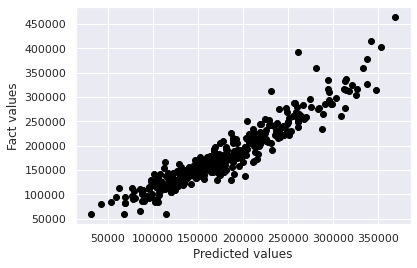

In [99]:
# Plot outputs
plt.scatter(linreg_predict_val, y_valid, color="black")
# plt.plot(linreg_predict_val, y_valid, color="blue", linewidth=3)

plt.xlabel('Predicted values')
plt.ylabel('Fact values')

plt.show()

the spread is small, which means that the forecast is quite similar to the fact. The model works well

not bad result :) 

In [100]:
# Model accuracy metrics
MAE_train = mean_absolute_error(y_train, linreg_predict_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, linreg_predict_train)) 

MAE_valid = mean_absolute_error(y_valid, linreg_predict_val)
RMSE_valid = np.sqrt(mean_squared_error(y_valid, linreg_predict_val)) 

result = pd.DataFrame({'data type': ['train', 'valid'], 
                       'MAE': [MAE_train, MAE_valid],
                       'RMSE': [RMSE_train, RMSE_valid]
                      })

result

,data type,MAE,RMSE
0,train,16055.641477,22223.641640
1,valid,15794.454375,21746.650923


In [101]:
# Make predictions of test data 
test_predict = linreg.predict(test)

test_result = pd.DataFrame({'id': test.index, 
                            'SalePrice_predicted': test_predict})
test_result.head()

,id,SalePrice_predicted
0,1461,99407.875278
1,1462,163674.049090
2,1463,169684.858133
3,1464,184401.327321
4,1465,192446.678988


Create a function for testing with different types of subsets

In [102]:
def get_model_results(model, X_tr, y_tr, X_val, y_val, X_test, target_is_log=False):
  '''
  input: model, subsets
  output: fitted model, accuracy metrics, prediction on test data 
  '''

  # Learning  
  model.fit(X_tr, y_tr)

  # Forecasting
  model_predict_train = model.predict(X_tr)
  model_predict_val = model.predict(X_val)

  # if target is logarithmic
  if target_is_log: 
    model_predict_train = np.exp(model_predict_train)
    model_predict_val = np.exp(model_predict_val)
    y_tr = np.exp(y_tr)
    y_val = np.exp(y_val)

  # Accuracy metrics 
  MAE_train = mean_absolute_error(y_tr, model_predict_train)
  RMSE_train = np.sqrt(mean_squared_error(y_tr, model_predict_train)) 

  MAE_valid = mean_absolute_error(y_val, model_predict_val)
  RMSE_valid = np.sqrt(mean_squared_error(y_val, model_predict_val)) 

  result = pd.DataFrame({'data type': ['train', 'valid'], 
                         'MAE': [MAE_train, MAE_valid],
                         'RMSE': [RMSE_train, RMSE_valid]
                        })
  
  # Prediction on test data
  test_predict = model.predict(X_test)

  test_result = pd.DataFrame({'id': X_test.index, 
                              'SalePrice_predicted': test_predict})

  return model, result, test_result

## with standardized data

In [103]:
linreg_std = LinearRegression()
linreg_std, result_std, test_result_std = get_model_results(linreg_std, X_train_sc, y_train_sc, X_valid_sc, y_valid_sc, test_scaled)

In [104]:
# Metrics MAE, RMSE
result_std

,data type,MAE,RMSE
0,train,16662.603829,22915.347199
1,valid,16162.903776,21924.748751


In [105]:
# Prediction
test_result_std.head()

,id,SalePrice_predicted
0,0,104974.883296
1,1,171887.628130
2,2,173588.634351
3,3,194449.357556
4,4,193529.072071


## with log(target)

In [106]:
linreg_log = LinearRegression()
linreg_log, result_log, test_result_log = get_model_results(linreg_log, X_train_log, y_train_log, X_valid_log, y_valid_log, test, target_is_log=True)

In [107]:
# Metric MAE, RMSE
result_log

,data type,MAE,RMSE
0,train,14086.241406,20318.979460
1,valid,12807.086871,18700.092549


In [108]:
# Test data prediction - !!! take the exponent of the forecasted values because target was logarithmic 
test_result_log['SalePrice_predicted'] = np.exp(test_result_log['SalePrice_predicted'])
test_result_log.head()

,id,SalePrice_predicted
0,1461,113297.597079
1,1462,157308.420237
2,1463,170266.820251
3,1464,195361.203658
4,1465,185637.471287


## with standardized data and log(target)

In [109]:
linreg_sc_log = LinearRegression()
linreg_sc_log, result_sc_log, test_result_sc_log = get_model_results(linreg_log, X_train_sc_log, y_train_sc_log, X_valid_sc_log, y_valid_sc_log, test_scaled, target_is_log=True)

In [110]:
# Metrics MAE, RMSE
result_sc_log

,data type,MAE,RMSE
0,train,14424.710063,20789.682272
1,valid,13188.359152,18947.251726


In [111]:
# Test data prediction - !!! take the exponent of the forecasted values because target was logarithmic 
test_result_sc_log['SalePrice_predicted'] = np.exp(test_result_sc_log['SalePrice_predicted'])
test_result_sc_log.head()

,id,SalePrice_predicted
0,0,114581.206935
1,1,160019.235198
2,2,171720.567407
3,3,200687.422066
4,4,186979.821156


## Summary

In [112]:
# Create summary dataset 

summary = pd.DataFrame()

res_list = [result, result_std, result_log, result_sc_log]
res_list_name = ['-', 'std data', 'log(target)', 'std data and log(target)' ]
for res, name in zip(res_list, res_list_name): 
  res['description'] = name
  summary = pd.concat([summary, res])

summary

,data type,MAE,RMSE,description
0,train,16055.641477,22223.641640,-
1,valid,15794.454375,21746.650923,-
0,train,16662.603829,22915.347199,std data
1,valid,16162.903776,21924.748751,std data
0,train,14086.241406,20318.979460,log(target)
1,valid,12807.086871,18700.092549,log(target)
0,train,14424.710063,20789.682272,std data and log(target)
1,valid,13188.359152,18947.251726,std data and log(target)


In [113]:
summary[summary['data type']=='valid']

,data type,MAE,RMSE,description
1,valid,15794.454375,21746.650923,-
1,valid,16162.903776,21924.748751,std data
1,valid,12807.086871,18700.092549,log(target)
1,valid,13188.359152,18947.251726,std data and log(target)


What is the best model? 

# Random Forest Model

In [114]:
# create an object of RF model
rf = RandomForestRegressor(random_state=17)

In [115]:
# Learning  
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [116]:
# Forecasting
rf_predict_train = rf.predict(X_train)
rf_predict_val = rf.predict(X_valid)

In [117]:
# Accuracy metrics MAE, RMSE
MAE_train = mean_absolute_error(y_train, rf_predict_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, rf_predict_train)) 

MAE_valid = mean_absolute_error(y_valid, rf_predict_val)
RMSE_valid = np.sqrt(mean_squared_error(y_valid, rf_predict_val)) 

result = pd.DataFrame({'data type': ['train', 'valid'], 
                       'MAE': [MAE_train, MAE_valid],
                       'RMSE': [RMSE_train, RMSE_valid]
                      })

result

,data type,MAE,RMSE
0,train,6499.940140,9580.659040
1,valid,14873.263016,20966.116324


In [118]:
# Forecasting on the test data 
test_predict = rf.predict(test)

test_result = pd.DataFrame({'id': test.index, 
                            'SalePrice_predicted': test_predict})
test_result.head()

,id,SalePrice_predicted
0,1461,125075.16
1,1462,151946.32
2,1463,184913.82
3,1464,184588.82
4,1465,190894.00


## with standardized data (unnecessary for RF)

In [119]:
rf_std = RandomForestRegressor(random_state=17)
rf_std, result_std, test_result_std = get_model_results(rf_std, X_train_sc, y_train_sc, X_valid_sc, y_valid_sc, test_scaled)

In [120]:
# metrics MAE, RMSE
result_std

,data type,MAE,RMSE
0,train,6444.764953,9531.448029
1,valid,15135.913777,21293.727437


In [121]:
# Forecast for test data
test_result_std.head()

,id,SalePrice_predicted
0,0,123506.40
1,1,153021.34
2,2,182390.00
3,3,185284.14
4,4,190084.63


## with log(target)

In [122]:
rf_log = RandomForestRegressor(random_state=17)
rf_log, result_log, test_result_log = get_model_results(rf_log, X_train_log, y_train_log, X_valid_log, y_valid_log, test, target_is_log=True)

In [123]:
# metrics MAE, RMSE
result_log

,data type,MAE,RMSE
0,train,6615.172605,9909.155326
1,valid,14939.833601,20946.757501


In [124]:
# Forecast for test data - Need to exponent because target was logarithmed  
test_result_log['SalePrice_predicted'] = np.exp(test_result_log['SalePrice_predicted'])
test_result_log.head()

,id,SalePrice_predicted
0,1461,125790.522020
1,1462,155513.996820
2,1463,180731.052013
3,1464,180359.695695
4,1465,192016.476092


## with standardized data and log(target)

In [125]:
rf_sc_log = RandomForestRegressor(random_state=17)
rf_sc_log, result_sc_log, test_result_sc_log = get_model_results(rf_sc_log, X_train_sc_log, y_train_sc_log, X_valid_sc_log, y_valid_sc_log, test_scaled, target_is_log=True)

In [126]:
# metrics MAE, RMSE
result_sc_log

,data type,MAE,RMSE
0,train,6631.197016,9955.197172
1,valid,15381.667739,21298.762219


In [127]:
# # Forecast for test data - Need to exponent because target was logarithmed  
test_result_sc_log['SalePrice_predicted'] = np.exp(test_result_sc_log['SalePrice_predicted'])
test_result_sc_log.head()

,id,SalePrice_predicted
0,0,123275.811144
1,1,151980.845521
2,2,180666.094221
3,3,182132.932917
4,4,191234.722437


## Summary

In [128]:
# Summary dataset

summary = pd.DataFrame()

res_list = [result, result_std, result_log, result_sc_log]
res_list_name = ['-', 'std data', 'log(target)', 'std data and log(target)' ]
for res, name in zip(res_list, res_list_name): 
  res['description'] = name
  summary = pd.concat([summary, res])

summary

,data type,MAE,RMSE,description
0,train,6499.940140,9580.659040,-
1,valid,14873.263016,20966.116324,-
0,train,6444.764953,9531.448029,std data
1,valid,15135.913777,21293.727437,std data
0,train,6615.172605,9909.155326,log(target)
1,valid,14939.833601,20946.757501,log(target)
0,train,6631.197016,9955.197172,std data and log(target)
1,valid,15381.667739,21298.762219,std data and log(target)


In [129]:
summary[summary['data type']=='valid']

,data type,MAE,RMSE,description
1,valid,14873.263016,20966.116324,-
1,valid,15135.913777,21293.727437,std data
1,valid,14939.833601,20946.757501,log(target)
1,valid,15381.667739,21298.762219,std data and log(target)


The best result was when data had been standardized and target had been logarithmed

# Conclusion

To summarise: 

1. Two main ML tasks - Classification (theory block), Regreession (practice block)
2. Pipeline of building ML model
3. Main problems with data and how to fix them
4. What else need to do with ML model:
  * tuning hyperparameters  
  * finding the optimal number of features

# Useful sources to start study ML

1. Kaggle Courses - Series of short intro coureses: https://www.kaggle.com/learn 
2. SQL trainer: https://www.sql-ex.ru
3. Book Morgunov PostgreSQL 
4. Machine Learning course by the OpenDataScience community: https://www.youtube.com/playlist?list=PLVlY_7IJCMJdgcCtQfzj5j8OVB_Y0GJCl 